In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

## Using Naive Bayes to predict outbreak

### Getting the aggregated data

In [2]:
X = np.genfromtxt('data/aggregated_data.csv',delimiter = ",", usecols =(1,3))[1:]
y = np.genfromtxt('data/aggregated_data.csv', delimiter=",", usecols = (8))[1:]
print(X)
print(y)


[[ 0.  95.1]
 [ 0.  89.3]
 [ 0.  86.8]
 ...
 [ 1.  92.1]
 [ 1.  92.1]
 [ 1.  92.7]]
[0. 0. 0. ... 0. 0. 0.]


### Split the dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

### MSE Function

In [4]:
def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

### Implementing the BernoulliNB

In [5]:
# Reference for Naive Bayes models: https://scikit-learn.org/stable/modules/naive_bayes.html
# Reference for BernoulliNB model: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

bernNB = BernoulliNB(binarize=True)
bernNB.fit(X_train, y_train)
print(bernNB)

bern_y_pred = bernNB.predict(X_test)
score = accuracy_score(y_test,bern_y_pred)
print("Accuracy of BernoulliNB: " + str(score * 100) + "%")

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
Accuracy of BernoulliNB: 96.33333333333334%


### Computing the MSE for BernoulliNB

In [6]:
Ytr_pred = bernNB.predict(X_train)
Yte_pred = bernNB.predict(X_test)

print("Train MSE:", mse(Ytr_pred,y_train))
print("Train MSE:", mse(Yte_pred,y_test))

Train MSE: 0.05
Train MSE: 0.03666666666666667


### Improving the BernoulliNB's binarize parameter

In [7]:
results = dict()

def improve_bernoulliNB():
    '''We can try to improve the bernoulliNB model by using different value for the binarize function'''
    binarize_param = 0.1
    while binarize_param < 1:
        bernNB = BernoulliNB(binarize=binarize_param)
        bernNB.fit(X_train, y_train)
        #print(bernNB)

        y_pred = bernNB.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        results[binarize_param] = score
        binarize_param += 0.01
        
def get_best_binarize_value():
    return sorted(results.items(), key = lambda x : x[1], reverse = True)[0][0]

improve_bernoulliNB()

print("Best value for the binarize parameter: ",get_best_binarize_value())

Best value for the binarize parameter:  0.1


In [8]:
bernNB = BernoulliNB(binarize=0.1)
bernNB.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

### Implementing the MultinomialNB

In [9]:
# Reference for MultinomialNB model: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

multNB = MultinomialNB()

multNB.fit(X_train, y_train)
print(multNB)

mult_y_pred = multNB.predict(X_test)
score = accuracy_score(y_test,mult_y_pred)
print("Accuracy of BernoulliNB: " + str(score * 100) + "%")

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy of BernoulliNB: 96.33333333333334%


### Computing the MSE for MultinomialNB

In [10]:
Ytr_pred = multNB.predict(X_train)
Yte_pred = multNB.predict(X_test)

print("Train MSE:", mse(Ytr_pred,y_train))
print("Train MSE:", mse(Yte_pred,y_test))

Train MSE: 0.05
Train MSE: 0.03666666666666667


### Implementing the GaussianNB

In [11]:
# Reference for GaussianNB model: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

gaussNB = GaussianNB()
gaussNB.fit(X_train,y_train)
print(gaussNB)

gauss_y_pred = multNB.predict(X_test)
score = accuracy_score(y_test,gauss_y_pred)
print("Accuracy of BernoulliNB: " + str(score * 100) + " %")

GaussianNB(priors=None)
Accuracy of BernoulliNB: 96.33333333333334 %


### Computing the MSE

In [12]:
Ytr_pred = gaussNB.predict(X_train)
Yte_pred = gaussNB.predict(X_test)

print("Train MSE:", mse(Ytr_pred,y_train))
print("Train MSE:", mse(Yte_pred,y_test))

Train MSE: 0.05
Train MSE: 0.03666666666666667


### Calculating the ROC Curve

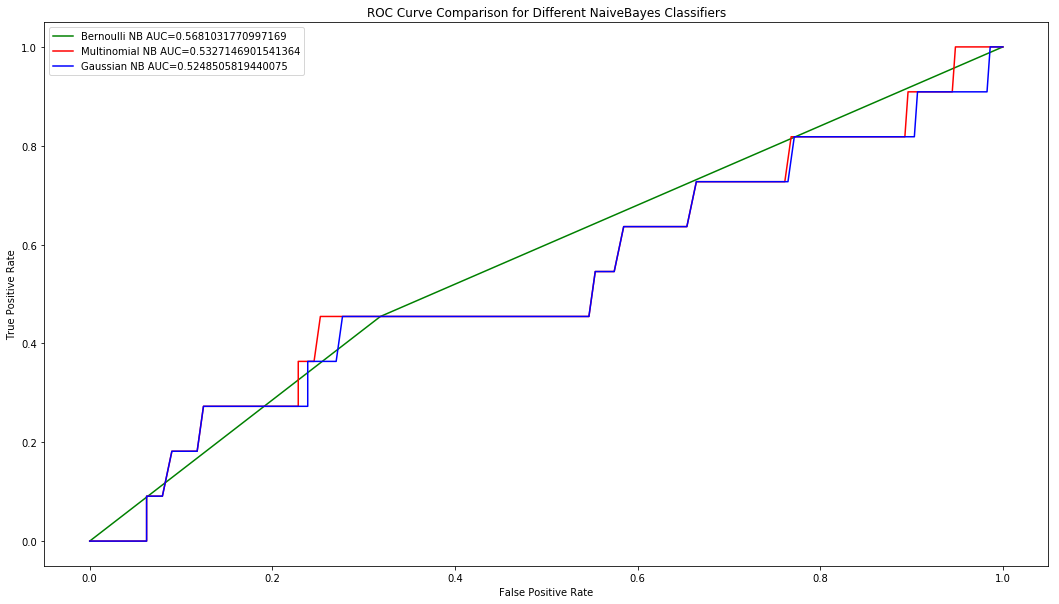

In [13]:
# Reference used: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

def plot_roc_curve(prob, model, col):
    fpr, tpr, thresholds = roc_curve(y_test,prob)
    area = auc(fpr,tpr)
    plt.plot(fpr, tpr, color=col , label=model + " AUC="+ str(area))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison for Different NaiveBayes Classifiers")
plt.rcParams['figure.figsize'] = (18.0, 10.0)
bern_prob = bernNB.predict_proba(X_test)[:,1]
mult_prob = multNB.predict_proba(X_test)[:,1]
gauss_prob = gaussNB.predict_proba(X_test)[:,1]

plot_roc_curve(bern_prob,"Bernoulli NB","g")
plot_roc_curve(mult_prob, "Multinomial NB","r")
plot_roc_curve(gauss_prob, "Gaussian NB","b")
plt.show()


### Confusion Matrix

In [14]:
def plotMatrix(confusionMatrix, title):
    classLabels = ["Outbreak", "No Outbreak"]
    plt.rcParams['figure.figsize'] = (18.0, 10.0)
    plt.imshow(confusionMatrix, cmap=plt.cm.Reds)
    plt.xticks([0,1], classLabels)
    plt.yticks([0,1], classLabels)
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")
    plt.title(title)
    plt.text(0, 0, str(confusionMatrix[0][0]), horizontalalignment="center", verticalalignment="center" ,color="black")
    plt.text(0, 1, str(confusionMatrix[0][1]), horizontalalignment="center", verticalalignment="center" ,color="black")
    plt.text(1, 0, str(confusionMatrix[1][0]), horizontalalignment="center", verticalalignment="center" ,color="black")
    plt.text(1, 1, str(confusionMatrix[1][1]), horizontalalignment="center", verticalalignment="center" ,color="white")
    plt.show()

    

In [17]:
# Reference used: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

def generate_confusion_matrix(threshold, prob,label):
    predictions = []
    for i in range(0,prob.shape[0]):
        if prob[i][1] <= threshold:
            predictions.append(0)
        else:
            predictions.append(1)
        
    confusionMatrix = confusion_matrix(y_test, predictions)
    normalizedConfusionMatrix = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    plotMatrix(confusionMatrix, label + " Confusion Matrix")
    plotMatrix(normalizedConfusionMatrix, label + " Normalized Confusion Matrix")

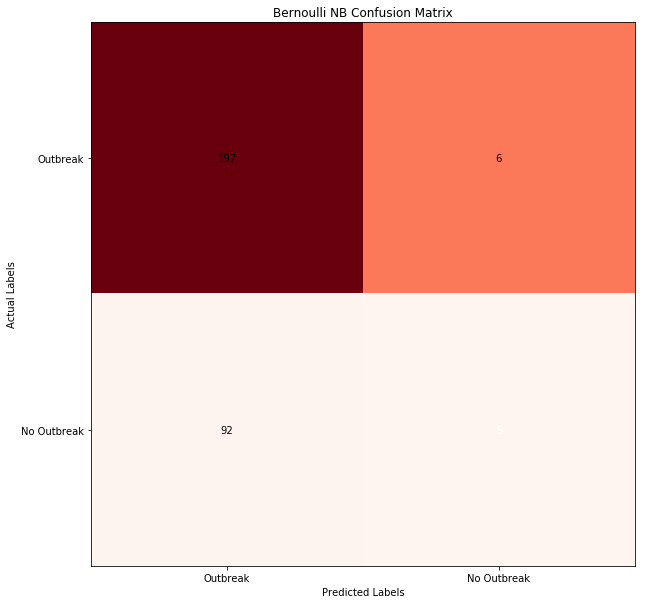

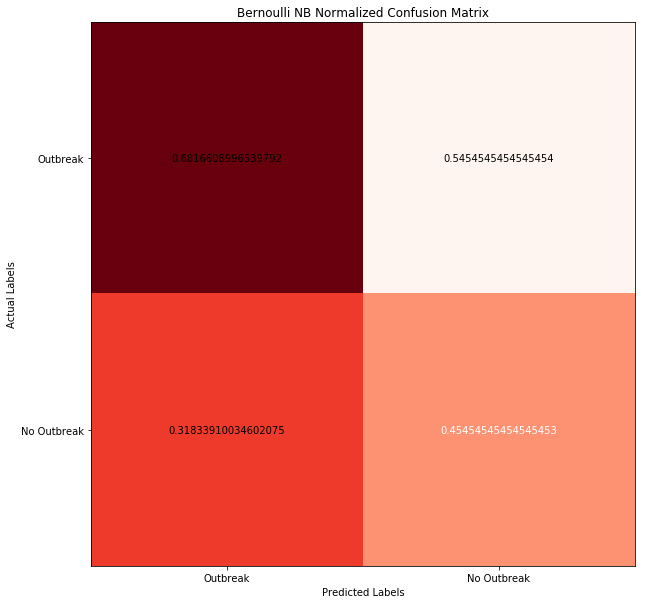

In [18]:
def generate_threshold(prob):
    return np.median(prob)


bern_prob = bernNB.predict_proba(X_test)
mult_prob = multNB.predict_proba(X_test)
gauss_prob = gaussNB.predict_proba(X_test)


generate_confusion_matrix(generate_threshold(bern_prob[:,1]),bern_prob,"Bernoulli NB")



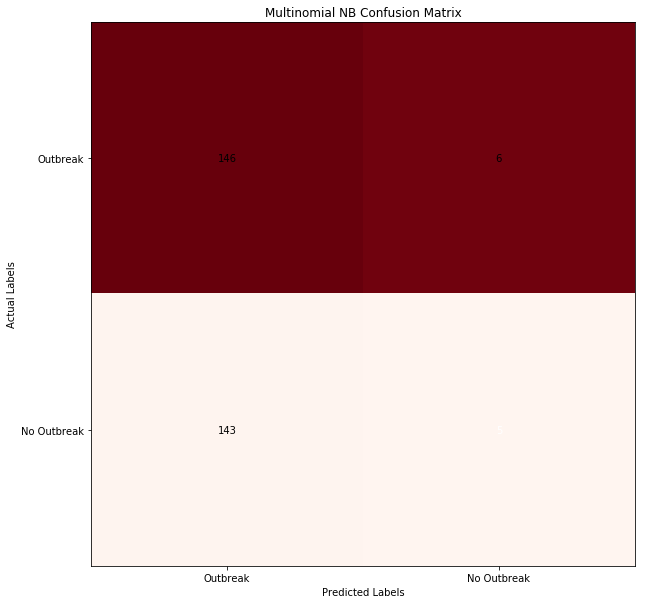

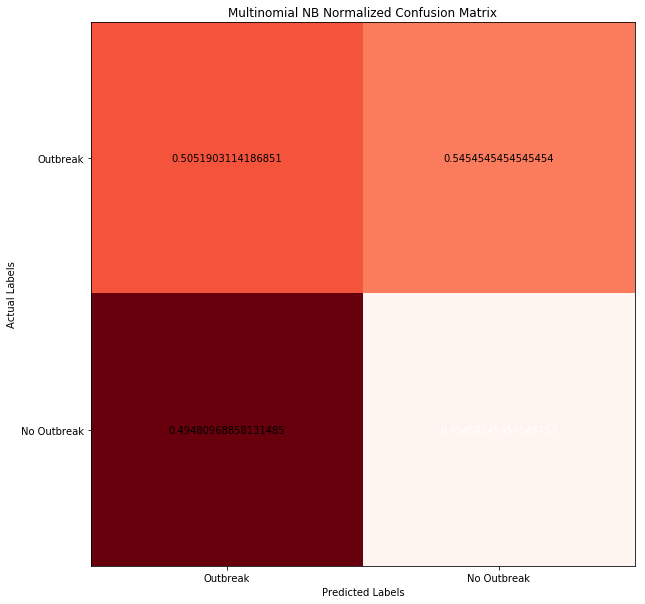

In [19]:
generate_confusion_matrix(generate_threshold(mult_prob[:,1]),mult_prob,"Multinomial NB")

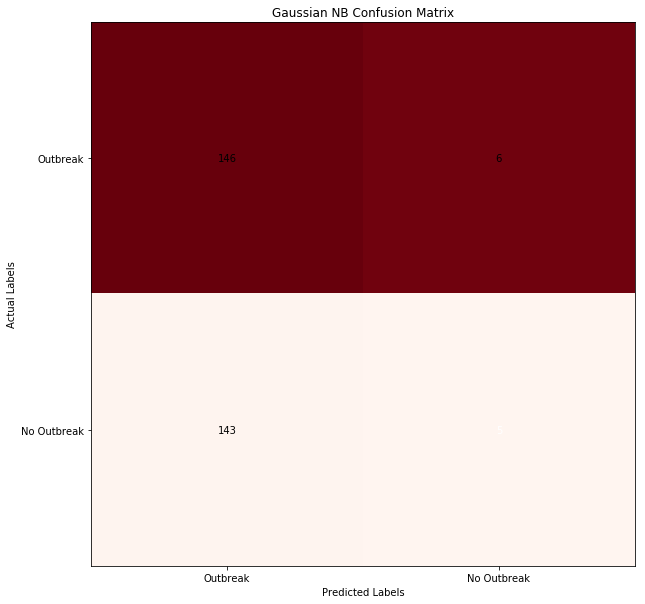

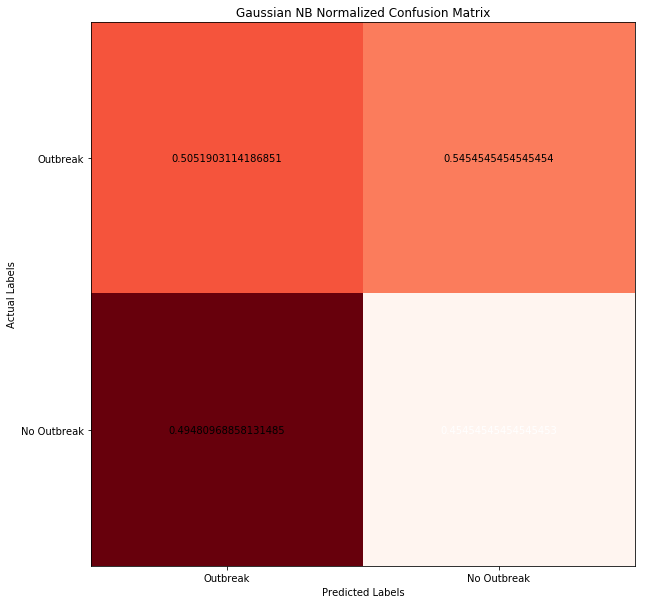

In [20]:
generate_confusion_matrix(generate_threshold(gauss_prob[:,1]),gauss_prob,"Gaussian NB")